In [1]:

import utils as utils
import pickle
from model import ERecogClassifier

import os

import numpy as np
import torch.nn as nn
import torch.optim as optim

In [2]:
train_acc = np.load('results/train_accuracies.npy')
train_loss = np.load('results/train_loss.npy')
val_loss = np.load('results/train_val_loss.npy')
val_acc = np.load('results/train_val_acc.npy')

augment_train_acc = np.load('results/train_augment_accuracies.npy')
augment_train_loss = np.load('results/train_augment_loss.npy')
augment_val_acc = np.load('results/train_augment_val_acc.npy')
augment_val_loss = np.load('results/train_augment_val_loss.npy')

spec_train_acc = np.load('results/train_spec_augment_accuracies.npy')
spec_train_loss = np.load('results/train_spec_augment_loss.npy')
spec_val_acc = np.load('results/train_spec_augment_val_acc.npy')
spec_val_loss =  np.load('results/train_spec_augment_val_loss.npy')

In [3]:
train_acc

array([0.2365416 , 0.30261011, 0.30783034, 0.34225122, 0.35464927,
       0.37128874, 0.37846656, 0.38825449, 0.3959217 , 0.42055465,
       0.43556281, 0.44991843, 0.44910277, 0.46998369, 0.47862969,
       0.49380098, 0.51305057, 0.51859706, 0.54208809, 0.55840131,
       0.56590538, 0.57422512, 0.58564437, 0.60195759, 0.60277325,
       0.60831974, 0.61337684, 0.62838499, 0.64551387, 0.63539967,
       0.65138662, 0.65774878, 0.65693312, 0.66264274, 0.66998369,
       0.66117455, 0.66737357, 0.68499184, 0.67618271, 0.68776509])

In [4]:
val_acc

array([0.27743902, 0.2652439 , 0.25152439, 0.36280488, 0.25457317,
       0.33689024, 0.3445122 , 0.36890244, 0.3429878 , 0.4527439 ,
       0.4375    , 0.43597561, 0.45579268, 0.47713415, 0.42378049,
       0.42073171, 0.45121951, 0.48018293, 0.42987805, 0.46189024,
       0.44359756, 0.44664634, 0.43140244, 0.44817073, 0.48018293,
       0.46036585, 0.47560976, 0.47408537, 0.44054878, 0.44664634,
       0.4527439 , 0.46036585, 0.46036585, 0.43292683, 0.44969512,
       0.45579268, 0.42987805, 0.43140244, 0.43597561, 0.44207317])

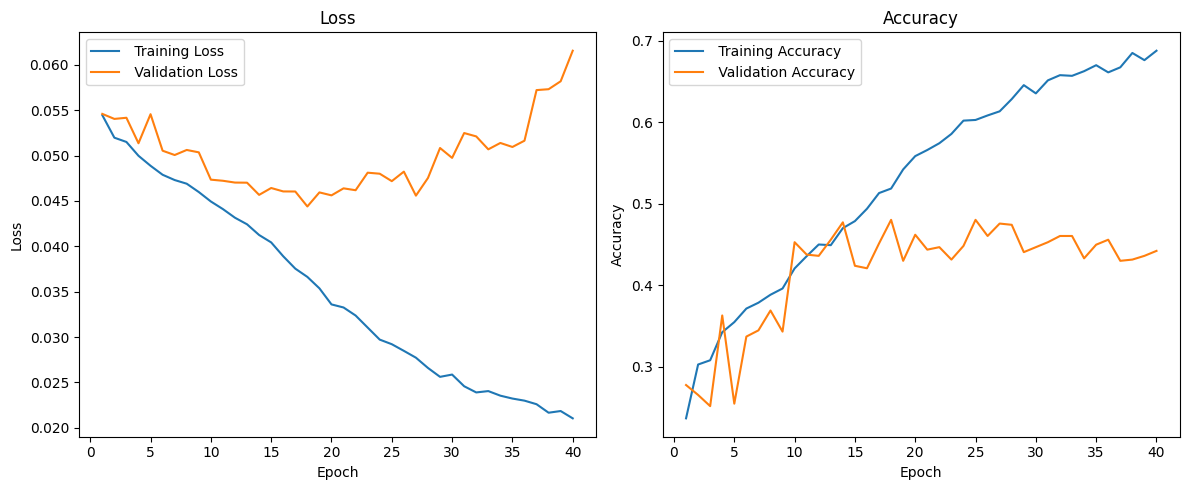

In [5]:
utils.plot_classification(train_loss,train_acc,val_loss,val_acc)

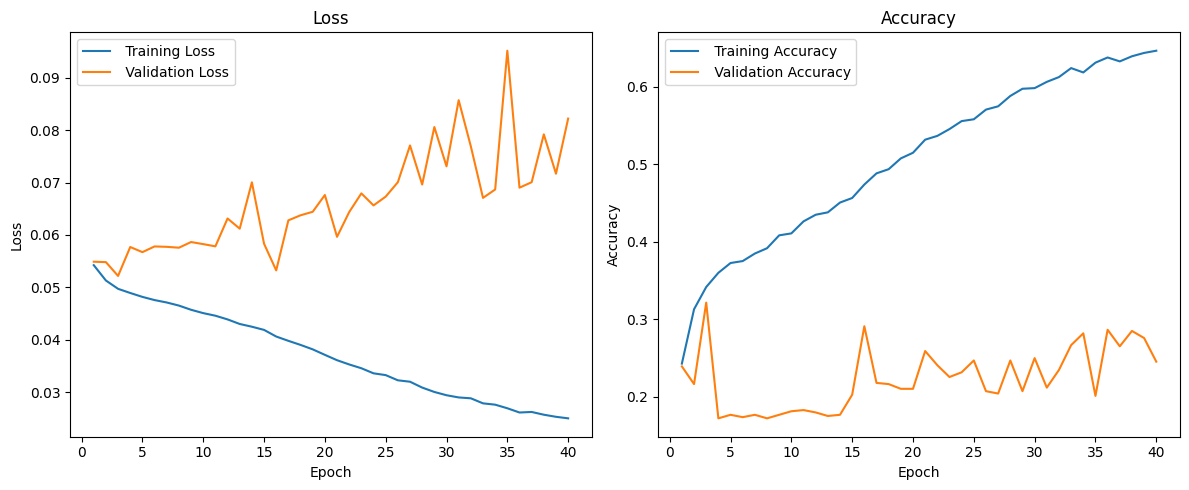

In [6]:
utils.plot_classification(augment_train_loss, augment_train_acc, augment_val_loss, augment_val_acc)

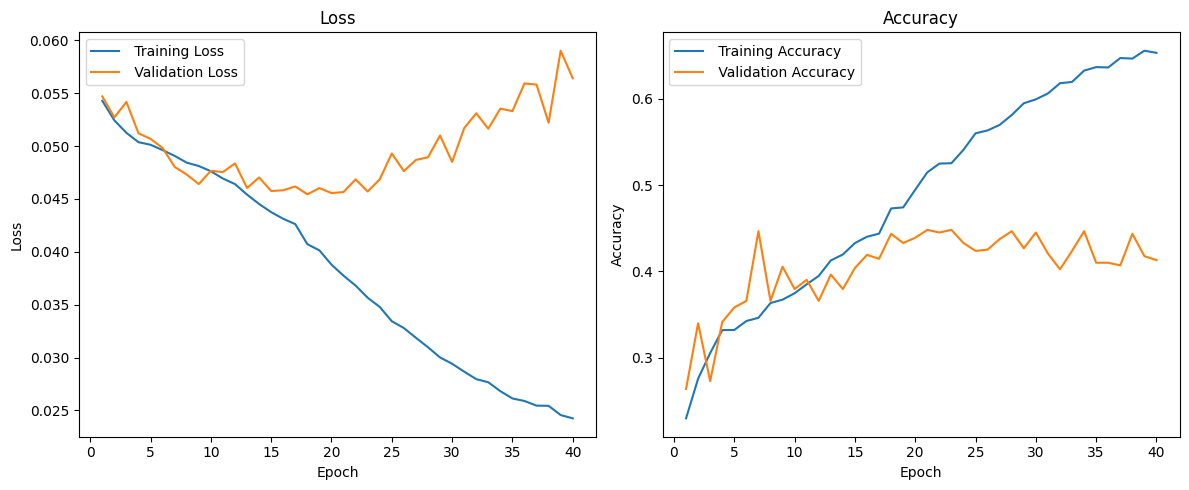

In [7]:
utils.plot_classification(spec_train_loss,spec_train_acc,spec_val_loss,spec_val_acc)

In [8]:
model = ERecogClassifier(num_classes=6)
optimizer = optim.Adam(model.parameters(), lr=5e-4)
num_epochs = 20
criterion = nn.NLLLoss()


train_loader = utils.create_data_loader(['batches/train/','batches/train_spec_augment/'], batch_size= 1, shuffle=True)
train_losses, train_accuracies, _, _ = utils.train_classification(model, criterion, optimizer, num_epochs, [train_loader], None)

Epoch [1/20], Train Loss: 0.0538, Train Accuracy: 0.2440
Epoch [2/20], Train Loss: 0.0518, Train Accuracy: 0.2998
Epoch [3/20], Train Loss: 0.0504, Train Accuracy: 0.3229
Epoch [4/20], Train Loss: 0.0496, Train Accuracy: 0.3427
Epoch [5/20], Train Loss: 0.0496, Train Accuracy: 0.3427
Epoch [6/20], Train Loss: 0.0487, Train Accuracy: 0.3634
Epoch [7/20], Train Loss: 0.0483, Train Accuracy: 0.3645
Epoch [8/20], Train Loss: 0.0479, Train Accuracy: 0.3698
Epoch [9/20], Train Loss: 0.0473, Train Accuracy: 0.3867
Epoch [10/20], Train Loss: 0.0470, Train Accuracy: 0.3858
Epoch [11/20], Train Loss: 0.0462, Train Accuracy: 0.3927
Epoch [12/20], Train Loss: 0.0460, Train Accuracy: 0.3951
Epoch [13/20], Train Loss: 0.0453, Train Accuracy: 0.4095
Epoch [14/20], Train Loss: 0.0442, Train Accuracy: 0.4251
Epoch [15/20], Train Loss: 0.0437, Train Accuracy: 0.4302
Epoch [16/20], Train Loss: 0.0429, Train Accuracy: 0.4400
Epoch [17/20], Train Loss: 0.0418, Train Accuracy: 0.4591
Epoch [18/20], Train Lo

In [9]:
os.makedirs('final_model', exist_ok=True)
with open('final_model/final.model.pickle','wb') as model_file:
     pickle.dump(model, model_file)


np.save('results/final_train_loss', train_losses)
np.save('results/final_train_accuracies', train_accuracies)